# Clase 6: Random Walk: origen del movimiento browniano

## Objetivo de la clase

Entender cómo modelamos el movimiento aleatorio en precios y por qué el movimiento browniano surge como límite de un random walk.

Al finalizar la clase el alumno debe poder explicar:

- Qué es un random walk

- Por qué aparece la distribución normal

- Por qué la incertidumbre crece con el tiempo

- Cómo esto conecta con precios financieros

# 1. Pregunta inicial: ¿cómo modelarías un precio?

**Si una acción vale 100 hoy:**

**¿Cómo modelarías su precio mañana?**

Ideas comunes:

- Puede subir o bajar
- No sabemos cuánto
- Parece aleatorio

Primera aproximación:

> El precio se mueve de forma aleatoria en pequeños pasos.
> 

Vamos a construir el modelo más simple posible.

---

# 2. Random Walk: modelo básico de incertidumbre

Supongamos que el precio cambia así:

- sube +1 con probabilidad 50%
- baja −1 con probabilidad 50%
- cada paso es independiente

Modelo:

$St=St−1+ϵt$

donde:

$ϵt=\{+150\% −150 \% \}$

Esto se conoce como **random walk**.

Interpretación financiera:

> El precio evoluciona como la suma de pequeños shocks aleatorios
>

## 3. Simulación de un random walk en Python

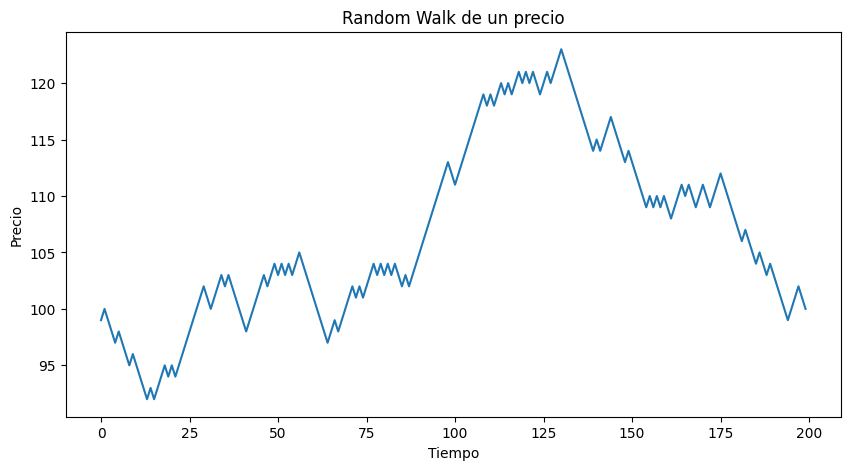

In [3]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

n_steps =200
steps = np.random.choice([-1,1], size=n_steps)
price =100 + np.cumsum(steps)

plt.figure(figsize=(10,5))
plt.plot(price)
plt.title("Random Walk de un precio")
plt.xlabel("Tiempo")
plt.ylabel("Precio")
plt.show()



### Preguntas para discutir:

- ¿Se ve predecible?
- ¿Tiene tendencia?
- ¿Podrías apostar dinero a su dirección?
- ¿Regresa al valor inicial?

Idea clave:

> No podemos predecir el camino exacto, pero sí su comportamiento estadístico.
>

# 4. Muchas simulaciones: aparece la distribución normal

Simulemos miles de precios finales.

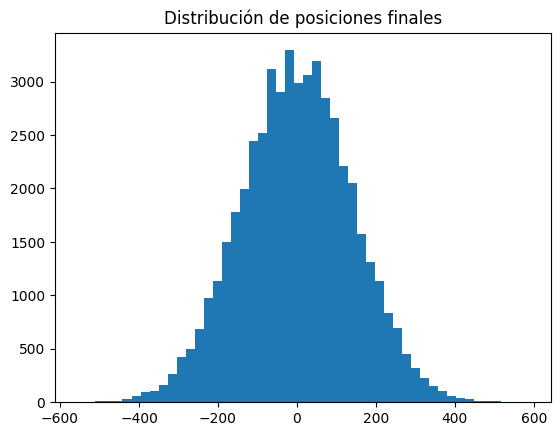

In [7]:
np.random.seed(1)

n_sim =50000
n_steps =20000

final_positions = []

for _ in range(n_sim):
    steps = np.random.choice([-1,1], size=n_steps)
    final_positions.append(np.sum(steps))

plt.hist(final_positions, bins=50)
plt.title("Distribución de posiciones finales")
plt.show()


Observación:

> La distribución se vuelve aproximadamente normal.
> 

Idea clave:

> La distribución normal aparece naturalmente cuando sumamos muchos shocks aleatorios independientes.
> 

---

# 5. La incertidumbre crece con el tiempo

Pregunta:

> ¿Es más incierto el precio mañana o en un año?
> 

Simulación:

In [8]:
np.random.seed(0)

n_sim =2000
times = [10,50,100,200,400]

for t in times:
    finals = []
for _ in range(n_sim):
        steps = np.random.choice([-1,1], size=t)
        finals.append(np.sum(steps))
        print(f"t={t}, var≈{np.var(finals):.2f}")

t=400, var≈0.00
t=400, var≈169.00
t=400, var≈354.67
t=400, var≈458.00
t=400, var≈367.04
t=400, var≈306.67
t=400, var≈275.10
t=400, var≈306.75
t=400, var≈404.25
t=400, var≈365.60
t=400, var≈359.14
t=400, var≈347.89
t=400, var≈331.93
t=400, var≈308.98
t=400, var≈296.11
t=400, var≈364.00
t=400, var≈380.01
t=400, var≈368.51
t=400, var≈351.71
t=400, var≈399.71
t=400, var≈380.75
t=400, var≈383.02
t=400, var≈368.85
t=400, var≈364.49
t=400, var≈362.24
t=400, var≈354.37
t=400, var≈341.90
t=400, var≈329.69
t=400, var≈319.58
t=400, var≈321.91
t=400, var≈318.18
t=400, var≈316.11
t=400, var≈309.25
t=400, var≈300.17
t=400, var≈291.79
t=400, var≈295.11
t=400, var≈293.87
t=400, var≈299.03
t=400, var≈293.78
t=400, var≈387.56
t=400, var≈378.35
t=400, var≈384.01
t=400, var≈383.70
t=400, var≈383.01
t=400, var≈374.51
t=400, var≈394.82
t=400, var≈402.50
t=400, var≈395.69
t=400, var≈388.19
t=400, var≈402.12
t=400, var≈395.66
t=400, var≈395.92
t=400, var≈421.17
t=400, var≈426.86
t=400, var≈420.04
t=400, var≈4

Resultado esperado:

> La varianza crece con el tiempo.
> 

Relación clave:

$\mathrm{Var} \propto t$

Qué significa en finanzas?

> Mientras más largo el horizonte, mayor la incertidumbre del precio.
> 

Esto es la base conceptual de la volatilidad.

# 6. De pasos discretos a movimiento continuo

Pregunta conceptual:

> ¿Qué pasa si hacemos los pasos cada vez más pequeños pero más frecuentes?
> 

Ejemplo:

- saltos grandes cada día
- micro cambios cada segundo

Mientras más pequeños los pasos, más suave el camino.

Idea fundamental:

> Si los pasos se vuelven infinitamente pequeños y frecuentes, obtenemos un movimiento continuo.
> 

Frase clave:

> El movimiento browniano es el límite continuo de un random walk.
> 

---

# 7. Primera aproximación a movimiento browniano

Simulación con pasos pequeños:

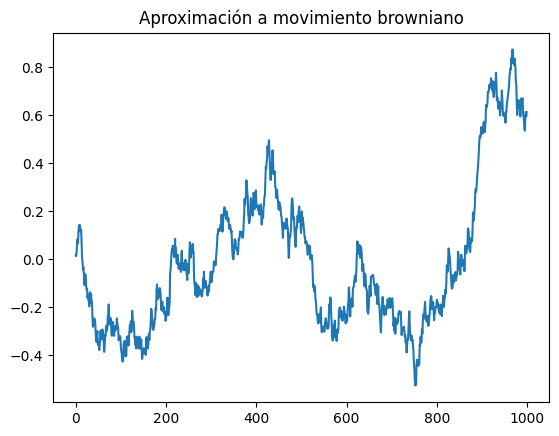

In [9]:
np.random.seed(42)

T =1
n =1000
dt = T/n

increments = np.random.normal(0, np.sqrt(dt), size=n)
W = np.cumsum(increments)

plt.plot(W)
plt.title("Aproximación a movimiento browniano")
plt.show()

Interpretación:

> Estamos simulando muchos pasos muy pequeños.
> 
> 
> El camino resultante se ve prácticamente continuo.
> 

Esto será la base de los modelos financieros que veremos durante el semestre.

---

# 8. Para recordar

Debes recordar:

1. Un random walk modela incertidumbre básica
2. La distribución final tiende a normal
3. La varianza crece con el tiempo
4. Pasos más pequeños y frecuentes producen caminos continuos
5. El movimiento browniano surge como límite del random walk

---

# 9. Actividad

Simular 200 random walks y graficarlos juntos.

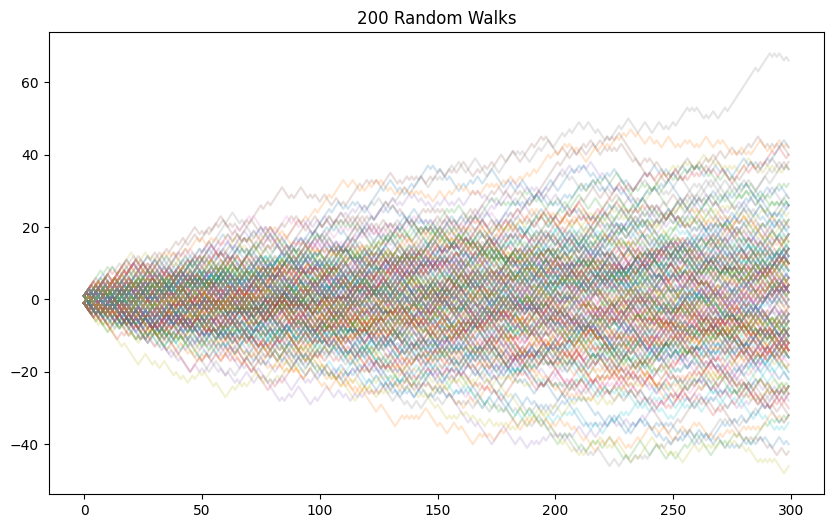

In [10]:
plt.figure(figsize=(10,6))

for _ in range(200):
    steps = np.random.choice([-1,1], size=300)
    path = np.cumsum(steps)
    plt.plot(path, alpha=0.2)

plt.title("200 Random Walks")
plt.show()

Reflexión:

> Aunque cada trayectoria es impredecible, su comportamiento agregado sí puede modelarse.
>